## **Day 13 of 30 days Data Analysis** 

In [23]:
import pandas as pd

# Local dataset
df = pd.read_csv("C:\\Users\\LENOVO\\Documents\\Programming\\30days_data_analysis\\week02_sql\\supermarket_processed_d12.csv")

# show head of dataset
df.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,cogs,gross income,Rating,Payment_Credit card,Payment_Ewallet,City_Naypyitaw,City_Yangon,CustomerType_lbl
0,750-67-8428,Alex,0,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-19,1:08:00 PM,522.83,26.1415,9.1,False,True,False,True,Member
1,226-31-3081,Giza,1,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-19,10:29:00 AM,76.40,3.8200,9.6,False,False,True,False,Normal
2,631-41-3108,Alex,1,Female,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,1:23:00 PM,324.31,16.2155,7.4,True,False,False,True,Normal
3,123-19-1176,Alex,0,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,465.76,23.2880,8.4,False,True,False,True,Member
4,373-73-7910,Alex,0,Female,Sports and travel,86.31,7,30.2085,634.3785,02-08-19,10:37:00 AM,604.17,30.2085,5.3,False,True,False,True,Member


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Invoice ID           1000 non-null   object 
 1   Branch               1000 non-null   object 
 2   Customer type        1000 non-null   int64  
 3   Gender               1000 non-null   object 
 4   Product line         1000 non-null   object 
 5   Unit price           1000 non-null   float64
 6   Quantity             1000 non-null   int64  
 7   Tax 5%               1000 non-null   float64
 8   Sales                1000 non-null   float64
 9   Date                 1000 non-null   object 
 10  Time                 1000 non-null   object 
 11  cogs                 1000 non-null   float64
 12  gross income         1000 non-null   float64
 13  Rating               1000 non-null   float64
 14  Payment_Credit card  1000 non-null   bool   
 15  Payment_Ewallet      1000 non-null   bo

In [25]:
df.shape

(1000, 19)

In [26]:
df.isnull().sum()

df.duplicated().sum()

np.int64(0)

In [27]:
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8484\936118274.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [28]:
df["Time"] = pd.to_datetime(df["Time"], format="%I:%M:%S %p").dt.time

In [29]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.day_name()

In [30]:
df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M:%S").dt.hour

In [31]:
df.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,...,Payment_Credit card,Payment_Ewallet,City_Naypyitaw,City_Yangon,CustomerType_lbl,Year,Month,Day,Weekday,Hour
0,750-67-8428,Alex,0,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,...,False,True,False,True,Member,2019,1,5,Saturday,13
1,226-31-3081,Giza,1,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,...,False,False,True,False,Normal,2019,3,8,Friday,10
2,631-41-3108,Alex,1,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,...,True,False,False,True,Normal,2019,3,3,Sunday,13
3,123-19-1176,Alex,0,Female,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,...,False,True,False,True,Member,2019,1,27,Sunday,20
4,373-73-7910,Alex,0,Female,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,...,False,True,False,True,Member,2019,2,8,Friday,10


In [32]:
df.groupby("Weekday")["Sales"].mean().sort_values()

Weekday
Monday       303.192624
Wednesday    305.812133
Friday       316.016838
Tuesday      325.836997
Thursday     328.617739
Sunday       334.269868
Saturday     342.200058
Name: Sales, dtype: float64

In [33]:
df.groupby("Month")["Sales"].mean()

Month
1    330.374625
2    320.856020
3    317.262339
Name: Sales, dtype: float64

<Axes: title={'center': 'Average Sales by Hour'}, xlabel='Hour'>

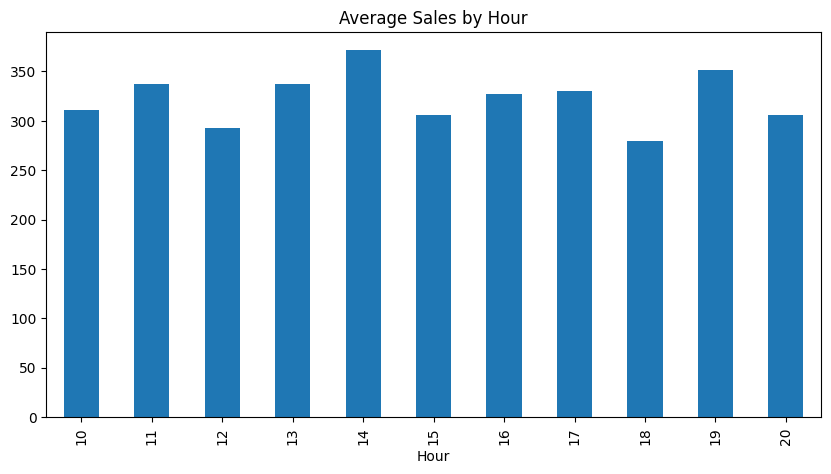

In [34]:
df.groupby("Hour")["Sales"].mean().plot(kind="bar", figsize=(10,5), title="Average Sales by Hour")

Weekday
Monday       303.192624
Wednesday    305.812133
Friday       316.016838
Tuesday      325.836997
Thursday     328.617739
Sunday       334.269868
Saturday     342.200058
Name: Sales, dtype: float64


<Axes: title={'center': 'Average Sales by Weekday'}, xlabel='Weekday'>

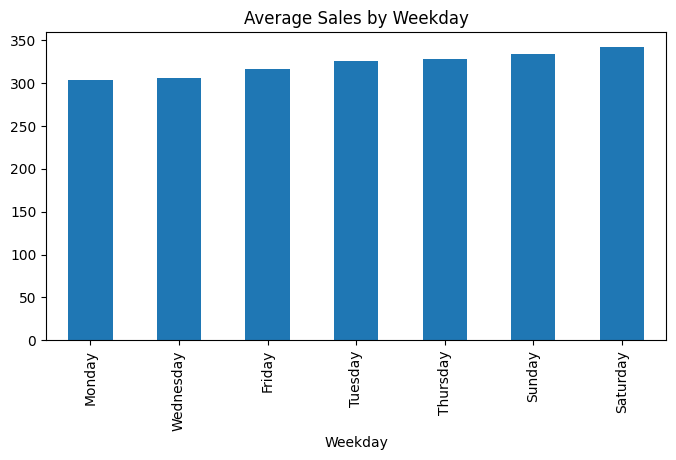

In [35]:
weekday_sales = df.groupby("Weekday")["Sales"].mean().sort_values()

print(weekday_sales)

weekday_sales.plot(kind="bar", figsize=(8,4), title="Average Sales by Weekday")

Month
1    330.374625
2    320.856020
3    317.262339
Name: Sales, dtype: float64


<Axes: title={'center': 'Average Sales by Month'}, xlabel='Month'>

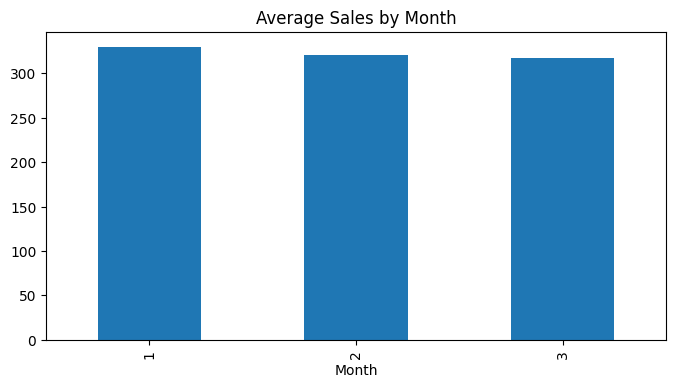

In [36]:
month_sales = df.groupby("Month")["Sales"].mean()

print(month_sales)

month_sales.plot(kind="bar", figsize=(8,4), title="Average Sales by Month")

Hour
10    311.103772
11    337.525883
12    292.875084
13    337.118709
14    371.426494
15    305.681456
16    327.614591
17    330.340784
18    279.896129
19    351.323124
20    306.260360
Name: Sales, dtype: float64


<Axes: title={'center': 'Average Sales by Hour'}, xlabel='Hour'>

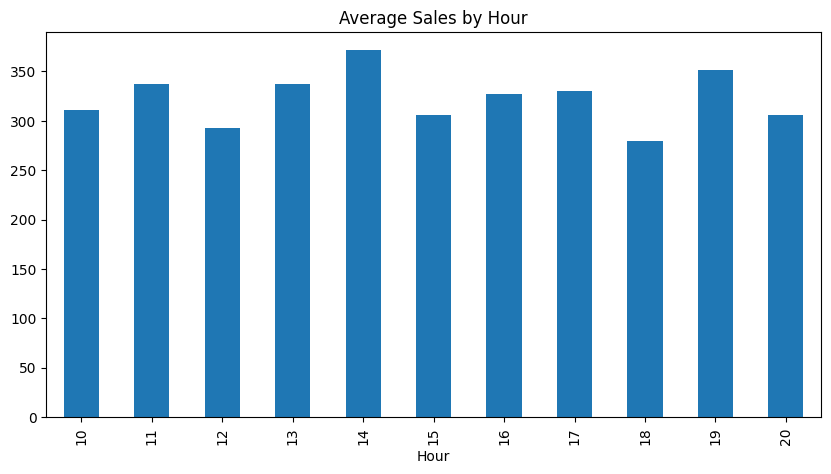

In [37]:
hour_sales = df.groupby("Hour")["Sales"].mean()

print(hour_sales)

hour_sales.plot(kind="bar", figsize=(10,5), title="Average Sales by Hour")

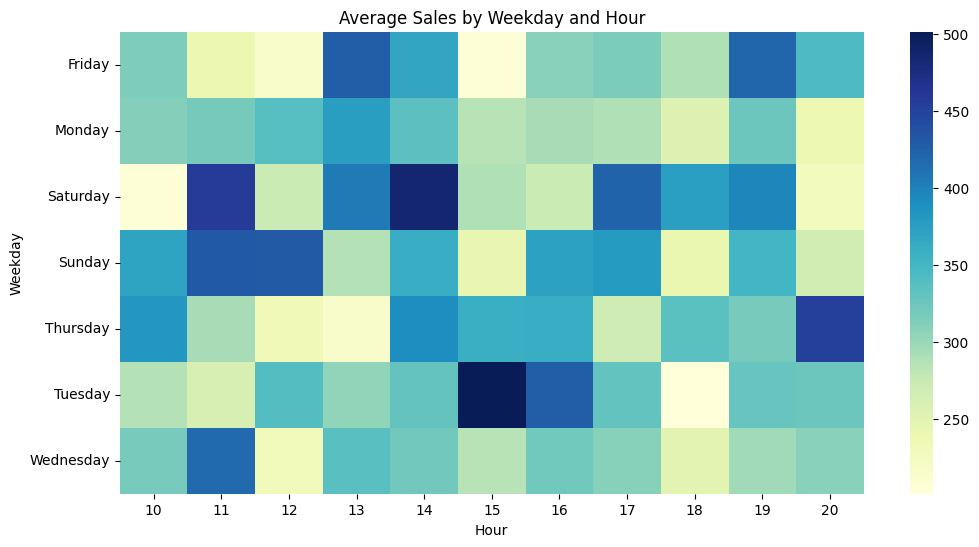

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df.groupby(["Weekday", "Hour"])["Sales"].mean().unstack()

plt.figure(figsize= (12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("Average Sales by Weekday and Hour")
plt.show()

### ***Insights from Time Analysis:***

***- Weekday:*** *Sales were highest on **Saturday**, and lowest on **Monday**.*  

***- Month:*** Peak sales occurred in **January (Month 1)**.*

***- Hour:*** *Sales peaked at **14:00 (2 PM)**, showing the strongest customer activity.*

***- Heatmap:*** *The busiest times were **Tuesday 15:00** and **Saturday 14:00**.*

### ***Export Cleaned Data:***

*- Finaly, exported the cleaned dataset for further analysis:*

In [43]:
df.to_csv("supermarket_d13.csv", index=False)